# **Personalized Dermacare System Based on your Skin**

This project is a *personalized* dermacare system based on the facial problems experienced.
The dataset used for this project is taken from kaggle

| Feature Name | Description |
| --- | --- |
|**product_href** | Product URL link |
|**product_name** | Product name |
|**product_type** |Type of product (Facial wash, Toner, Serum, Moisturizer, Sunscreen) |
|**brand** | Product brand |
|**notable_effects** | What it's good for |
|**skintype** | The suitable type of skin for the product (Normal, Dry, Oily, Combination, Sensitive) |
|**price** | Product price (in IDR Rp) |
|**description** | Product description |
|**picture_src** | Product image URL link |

### **Importing Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

### **Data Exploration**

In [ ]:
skincare = pd.read_csv('skincare_dataset.csv')
skincare.info()
skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_href     1224 non-null   object
 1   product_name     1224 non-null   object
 2   product_type     1224 non-null   object
 3   brand            1224 non-null   object
 4   notable_effects  1224 non-null   object
 5   skin_type        1224 non-null   object
 6   price            1224 non-null   object
 7   description      1224 non-null   object
 8   picture_src      1224 non-null   object
dtypes: object(9)
memory usage: 86.2+ KB


,product_href,product_name,product_type,brand,notable_effects,skin_type,price,description,picture_src
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 209,000","Lifts dirt and removes makeup in 1 step, while...",https://www.beautyhaul.com/assets/uploads/prod...
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination","Rp. 181,800",Cleanses and soothes sensitive skin with dense...,https://images.soco.id/8f08ced0-344d-41f4-a15e...
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive","Rp. 149,000","Lifts dirt, dust and make up residue while bal...","https://www.soco.id/cdn-cgi/image/w=73,format=..."
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 290,000",Pre-essence formulated with Witch Hazel extrac...,https://www.beautyhaul.com/assets/uploads/prod...
4,https://www.sociolla.com/essence/38023-licori...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry","Rp. 194,650",Essence mist with high moisture which has a co...,"https://www.sociolla.com/cdn-cgi/image/w=425,f..."


In [ ]:
# Check duplicated rows
skincare.duplicated().sum()

15

In [ ]:
# Describe the features
cat = ['product_type', 'brand', 'notable_effects', 'skin_type']

skincare[cat].describe()

,product_type,brand,notable_effects,skin_type
count,1224,1224,1224,1224
unique,5,202,149,15
top,Serum,SOMETHINC,"Pore-Care, Brightening, Anti-Aging",Oily
freq,307,80,150,310


**SUMMARY**
1. In this dataset, total there are 1224 products scrapped from websites.  
2. Because this data was scrapped and arranged, it looks neater and cleaner. There's no null value.  
3. Unfortunately, there are 14 duplicate rows. Need to be removed.  
4. Of 5 types of products, serum is more hype than others.     
6. From many pairs of notable effects, 150 products are good for pore care, brightening, and anti-aging all in one product.  
7. Looks like many skin care products suitable for oily skin.  

### **Exploratory Data Analysis (EDA)**

In [ ]:
counts_brand = skincare['brand'].value_counts()
count_percentage = skincare['brand'].value_counts(1)*100
counts_dfbrand = pd.DataFrame({'Brand':counts_brand.index,'Counts':counts_brand.values,'Percent%':np.round(count_percentage.values,2)})
top_10_brands = counts_dfbrand.head(10)
top_10_brands

,Brand,Counts,Percent%
0,SOMETHINC,80,6.54
1,WARDAH,69,5.64
2,INNISFREE,49,4.00
3,AVOSKIN,39,3.19
4,ERHA,33,2.70
5,ELSHE SKIN,24,1.96
6,THE BODY SHOP,23,1.88
7,BANANA BOAT,22,1.80
8,AZARINE,20,1.63
9,BHUMI,19,1.55


<ipython-input-16-f74e165c72e6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




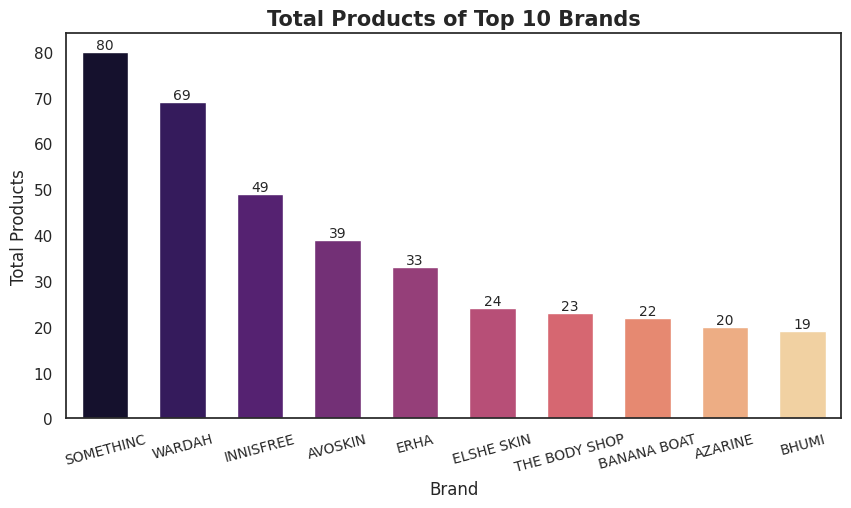

In [ ]:
# Brand

plt.figure(figsize=(10, 5))
sns.set(style='white')
ax = sns.barplot(x='Brand', y='Counts', width = 0.6, data=top_10_brands, palette='magma')
ax.set_title('Total Products of Top 10 Brands', fontsize=15, fontweight='bold')
ax.set_xlabel('Brand', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Products', fontsize=12, fontweight='medium')

for label in ax.containers:
    ax.bar_label(label, fontweight='medium', fontsize=10)
plt.xticks(rotation = 15, fontsize=10)
plt.show()

In [ ]:
# Checking product type

pd_type = pd.DataFrame()
pd_type["Count"] = skincare["product_type"].value_counts()
pd_type["Count%"] = skincare["product_type"].value_counts()/skincare.shape[0]*100
pd_type

,Count,Count%
product_type,,
Serum,307,25.081699
Toner,255,20.833333
Moisturizer,248,20.261438
Sunscreen,212,17.320261
Face Wash,202,16.503268


In [ ]:
fig = px.pie(pd_type, values = 'Count', color = pd_type.index, names = pd_type.index,
             color_discrete_sequence = ['#003049','#D62828', '#F77F00', '#FCBF49', '#E9D8A6'], hole = 0.5)
fig.update_traces(textposition = 'outside', textfont = dict(color = 'dark blue', size = 15), textinfo = 'label+percent', pull = [0.2,0,0,0], rotation = 10)
fig.add_annotation (text = 'Product Type', showarrow = False, font = dict(size = 12, color='dark blue'))
fig.update_layout(title={'text':'Skin Care Product Type', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
# Skin Type That Suitable For the Product
counts = skincare['skin_type'].value_counts()
count_percentage = skincare['skin_type'].value_counts(1)*100
counts_df = pd.DataFrame({'Skin_type':counts.index,'Counts':counts.values,'Percent%':np.round(count_percentage.values,2)})
counts_df

,Skin_type,Counts,Percent%
0,Oily,310,25.33
1,"Normal, Dry, Oily, Combination, Sensitive",263,21.49
2,Dry,167,13.64
3,"Normal, Dry",93,7.60
4,"Normal, Dry, Oily, Combination",68,5.56
5,Sensitive,55,4.49
6,"Normal, Dry, Oily, Sensitive",52,4.25
7,"Oily, Combination, Sensitive",43,3.51
8,"Dry, Oily, Sensitive",36,2.94
9,"Dry, Sensitive",27,2.21


In [ ]:
# Skin Type
top_7 = counts_df.head(7)
sns.set(style='white')
fig = px.bar(data_frame=top_7, x='Skin_type', y='Counts',
       color='Counts', color_continuous_scale='Inferno_r',
       width=800, height=600,
       text_auto=True, title=f'Count of Skin Type That Suitable For The Product')
fig.update_layout(plot_bgcolor='#FFFCF2', xaxis_tickangle = 15)
fig.show()

In [ ]:
# Creating numerical labels of notable_effects due to many effects shown by the diagram above
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

,product_href,product_name,product_type,brand,notable_effects,skin_type,price,description,picture_src,labels
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 209,000","Lifts dirt and removes makeup in 1 step, while...",https://www.beautyhaul.com/assets/uploads/prod...,23
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination","Rp. 181,800",Cleanses and soothes sensitive skin with dense...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,125
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive","Rp. 149,000","Lifts dirt, dust and make up residue while bal...","https://www.soco.id/cdn-cgi/image/w=73,format=...",125
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 290,000",Pre-essence formulated with Witch Hazel extrac...,https://www.beautyhaul.com/assets/uploads/prod...,23
4,https://www.sociolla.com/essence/38023-licori...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry","Rp. 194,650",Essence mist with high moisture which has a co...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",44


In [ ]:
# Skin Type That Suitable For the Product
counts_effect = skincare['notable_effects'].value_counts()
count_percentage = skincare['notable_effects'].value_counts(1)*100
counts_effect_df = pd.DataFrame({'Notable_Effects':counts_effect.index,'Counts':counts_effect.values,'Percent%':np.round(count_percentage.values,2)})
counts_effect_df.head(10)

,Notable_Effects,Counts,Percent%
0,"Pore-Care, Brightening, Anti-Aging",150,12.25
1,Anti Aging,105,8.58
2,"Acne-Free, Oil-Control, Pore-Care",86,7.03
3,"Moisturizing, Brightening, Black-Spot",71,5.80
4,"Hydrating, Moisturizing",70,5.72
5,"Acne-Free, Pore-Care, Brightening, Anti-Aging",64,5.23
6,"Brightening, Anti Aging",57,4.66
7,"Hydrating, Soothing",54,4.41
8,"Soothing, Balancing",44,3.59
9,UV Protection,43,3.51


In [ ]:
top_5 = counts_effect_df.head(5)
fig = px.pie(top_5, values = 'Counts', color = 'Notable_Effects', names = 'Notable_Effects',
             color_discrete_sequence = ['#99582A','#F4ACB7', '#FFCCD5', '#FDFCDC', '#C6AC8F'])
fig.update_traces(textposition = 'inside', textfont = dict(color = 'black', size = 15), textinfo = 'percent')
fig.update_layout(title={'text':'Skin Care Product Notable Effects', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

### **Data Cleaning**

In [ ]:
# Remove duplicated rows (15 in total)
skincare.drop_duplicates(inplace=True)

# Re-checking the existence of duplicated rows
skincare.duplicated().sum()

0

### **Data Preparation**

**Encoding Each Skintypes**

In [ ]:
# Separate all skintype into one list, considering comma + space as separators
skintype = skincare['skin_type'].str.split(', ').tolist()

# Flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# Convert to a set to make unique
set_skintype = set(flat_skintype)

# Back to list
unique_skintype = list(set_skintype)

# Create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# For each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skin_type.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

In [ ]:
skincare.head(5)

,product_href,product_name,product_type,brand,notable_effects,skin_type,price,description,picture_src,labels,Normal,Oily,Combination,Dry,Sensitive,Normal,Oily,Combination,Dry,Sensitive
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 209,000","Lifts dirt and removes makeup in 1 step, while...",https://www.beautyhaul.com/assets/uploads/prod...,23,0,1,0,0,0,0,1,0,0,0
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination","Rp. 181,800",Cleanses and soothes sensitive skin with dense...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,125,1,0,1,1,0,1,0,1,1,0
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive","Rp. 149,000","Lifts dirt, dust and make up residue while bal...","https://www.soco.id/cdn-cgi/image/w=73,format=...",125,1,1,1,1,1,1,1,1,1,1
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,"Rp. 290,000",Pre-essence formulated with Witch Hazel extrac...,https://www.beautyhaul.com/assets/uploads/prod...,23,0,1,0,0,0,0,1,0,0,0
4,https://www.sociolla.com/essence/38023-licori...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry","Rp. 194,650",Essence mist with high moisture which has a co...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",44,1,0,0,1,0,1,0,0,1,0


### **Exporting the DataFrame as a CSV file**

The next stage is to extract the cleaned and prepared dataset into .csv format, to enter the modeling and deployment stage in the app.py file

In [ ]:
skincare.to_csv("export_skincare.csv")

### **Modelling**

### **TF-IDF Vectorizer**

The TF-IDF Vectorizer will be used in the recommendation system to find a representation of the important features of each notable_effects category. We will use the tfidfvectorizer() function from the sklearn library.

In [ ]:
# Modeling with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculation on 'notable_efects' data
tf.fit(skincare['notable_effects'])

# Mapping array from integer index feature to name feature
tf.get_feature_names_out()

array(['acne', 'aging', 'anti', 'balancing', 'barrier', 'black',
       'brightening', 'care', 'control', 'free', 'hydrating',
       'moisturizing', 'no', 'oil', 'pore', 'protection', 'refreshing',
       'skin', 'soothing', 'spot', 'uv', 'whitecast'], dtype=object)

In [ ]:
# Doing fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(skincare['notable_effects'])

# Viewing matrix size TF IDF
shape = tfidf_matrix.shape
shape

(1209, 22)

In [ ]:
# Convert TF-IDF vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0.44968649, 0.32726185, 0.32726185, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.41642928, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.42429556, 0.42429556, ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Making dataframe to see TF-IDF matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=skincare.product_name
).sample(shape[1], axis=1).sample(10, axis=0)

,hydrating,anti,acne,protection,skin,oil,pore,moisturizing,control,barrier,...,no,free,refreshing,black,balancing,uv,whitecast,aging,care,soothing
product_name,,,,,,,,,,,,,,,,,,,,,
HANASUI Serum Rich Nutrition,0.000000,0.707107,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.707107,0.000000,0.000000
The Body Shop Tea Tree Skin Clearing Mattifying Toner,0.687765,0.000000,0.000000,0.0,0.0,0.000000,0.513313,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.513313,0.000000
VOTRE PEAU Maharis Clinic Vit.C Serum 30ml (Blue Bottle),0.000000,0.424296,0.000000,0.0,0.0,0.000000,0.482495,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.424296,0.482495,0.000000
COSRX One Step Original Clear Pads,0.000000,0.384879,0.528858,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.529708,0.0,0.000000,0.000000,0.0,0.0,0.384879,0.000000,0.000000
SKEYNDOR Pure Cleansing Foam,0.000000,0.000000,0.392855,0.0,0.0,0.489606,0.325119,0.000000,0.489606,0.0,...,0.0,0.393487,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.325119,0.000000
Whitelab Brightening Facial Wash,0.000000,0.327262,0.449686,0.0,0.0,0.000000,0.372152,0.000000,0.000000,0.0,...,0.0,0.450409,0.0,0.000000,0.000000,0.0,0.0,0.327262,0.372152,0.000000
Wardah Acnederm Night Treatment Moisturizer,0.572934,0.000000,0.516698,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.517528,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Erha Skin Barrier Face Moisturizer,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
SCARLETT WHITENING Brightly Ever After Night Cream,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.401366,0.000000,0.0,...,0.0,0.000000,0.0,0.608198,0.000000,0.0,0.0,0.000000,0.000000,0.000000


### **Cosine Similarity**

In [ ]:
# Calculating Cosine Similarity on the TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.3751278 , 0.        ,
        0.77130632],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3751278 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.77130632, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Creating a dataframe from the cosine_similarity variable with rows and columns in the form of product names
cosine_sim_df = pd.DataFrame(cosine_sim, index=skincare['product_name'], columns=skincare['product_name'])

# See the similarity matrix for each product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

product_name,AZARINE Miraclear Herbal Peeling Serum,Emina Bright Stuff Tone Up Cream,AVOSKIN Miraculous Retinol Toner,CLINIQUE Dramatically Different Moisturizing Lotion+ 125ml,NEOGEN Real Cica Pad
product_name,,,,,
Wardah C Defense Energizing Whip Foam,0.595880,0.313737,0.595880,0.000000,0.000000
ELSHE SKIN Acne Night Cream Treatment,0.595880,0.313737,0.595880,0.000000,0.000000
SCARLETT WHITENING Acne Serum,0.771306,1.000000,0.771306,0.000000,0.600045
Innisfree Intensive Triple-shield Sunscreen SPF50+ PA++++ 50ml,0.000000,0.000000,0.000000,0.000000,0.000000
Sukin Rose Hydrating Mist Toner,0.000000,0.000000,0.000000,0.648155,0.000000
Erha AcneAct Acne Sun Friendly SPF30/PA+++,0.434707,0.000000,0.434707,0.000000,0.000000
BANANA BOAT Deep Tanning Oil SPF2,0.260239,0.337400,0.260239,0.000000,0.562292
Banana Boat Simply Protect Aqua Daily Moisture Sunscreen Lotion SPF50+,0.000000,0.000000,0.000000,0.000000,0.000000
Wardah Renew You Anti Aging Day Cream,0.260239,0.337400,0.260239,0.000000,0.562292


### **Getting Recommendation**

In [ ]:
def skincare_recommendations(nama, similarity_data=cosine_sim_df, items=skincare[['product_name', 'notable_effects']], k=5):

    # Retrieve data by using argpartition to partition indirectly along a given axis
    # Dataframe converted to be numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))

    # Retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop a name so that the name of the product we are looking for doesnt' appear in the list of recommendations
    closest = closest.drop(nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
skincare[skincare.product_name.eq('ELSHE SKIN Radiant Supple Serum')].head()

,product_href,product_name,product_type,brand,notable_effects,skin_type,price,description,picture_src,labels,Normal,Oily,Combination,Dry,Sensitive,Normal,Oily,Combination,Dry,Sensitive
292,https://www.beautyhaul.com/product/detail/radi...,ELSHE SKIN Radiant Supple Serum,Serum,ELSHE SKIN,"Acne-Free, Brightening, Black-Spot","Normal, Dry, Oily, Combination, Sensitive","Rp. 182,750",ElsheSkin Radiant Supple Serum or Radiant Skin...,https://www.beautyhaul.com/assets/uploads/prod...,8,1,1,1,1,1,1,1,1,1,1


Trying to test the model by getting recommendation

In [ ]:
 # Getting skin care product recommendation which similar to Wardah Renew You Anti Aging Day Cream
skincare_recommendations("ELSHE SKIN Radiant Supple Serum")

,product_name,notable_effects
0,SOMETHINC Dark Spot Reducer Ampoule,"Acne-Free, Brightening, Black-Spot"
1,AVOSKIN YOUR SKIN BAE SERIES Niacinamide 12% +...,"Hydrating, Acne-Free, Brightening, Black-Spot"
2,Mineral Botanica Perfect Purifying Acne Night ...,"Moisturizing, Acne-Free, Black-Spot"
3,BREYLEE Step 2 Pore Minimizer Serum - Shrink F...,"Acne-Free, Pore-Care, Black-Spot"
4,PURIVERA BOTANICALS Sugar Willow Serum - Fruit...,"Acne-Free, Pore-Care, Black-Spot"
